# Phising Email Sentiment Analysis

# Imports

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from transformers import AutoTokenizer

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from tensorflow.keras.layers import Dense, Bidirectional, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Functions

In [14]:
def check_for_nulls_dupes(df):
  print(f"Amount of Null Values: {df.isna().sum()}")
  print(f"Amount of Dupe Values: {df.duplicated().sum()}")

def check_class_imbalance(target):
  
  unique, counts = np.unique(target, return_counts=True)
  plt.figure(figsize=(10, 6))
  plt.title("Target Class Breakdown")
  plt.pie(counts, labels=unique, startangle=140, autopct="%1.1f%%")
  plt.show()
  
  plt.figure(figsize=(10, 6))
  plt.title("Target Class Breakdown")
  sns.countplot(x=target)
  plt.xlabel("Target Classes")
  plt.ylabel("Counts")
  plt.xticks(rotation=45)
  plt.show()

def remove_stop(words):
  word_tokens = " ".join(word_tokenize(words)).split(" ")
  filtered_tokens = re.sub(r'[^a-zA-Z\s]', "", word_tokens).split(" ")
  filtered_sentence = [w.lower().strip() for w in filtered_tokens if w.lower() not in ENGLISH_STOP_WORDS]
  return " ".join(filtered_sentence).strip()

# EDA Analysis

In [17]:
df = pd.read_csv("/Users/maukanmir/Downloads/archive/phishing_email.csv")
df

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
...,...,...
82481,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1
82483,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1


# Check for Nulls and Dupes

In [18]:
check_for_nulls_dupes(df)

Amount of Null Values: text_combined    0
label            0
dtype: int64
Amount of Dupe Values: 408


In [19]:
df.drop_duplicates(inplace=True)

# Check For Class Imbalance

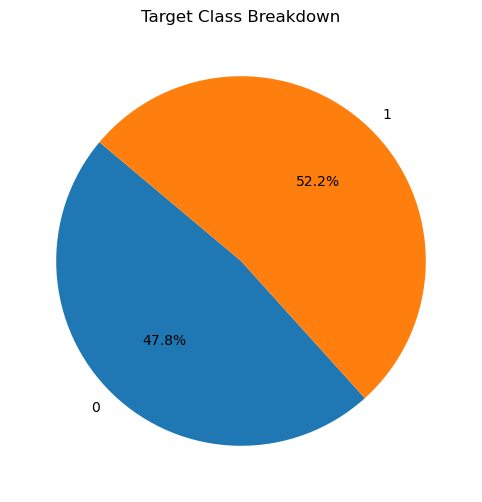

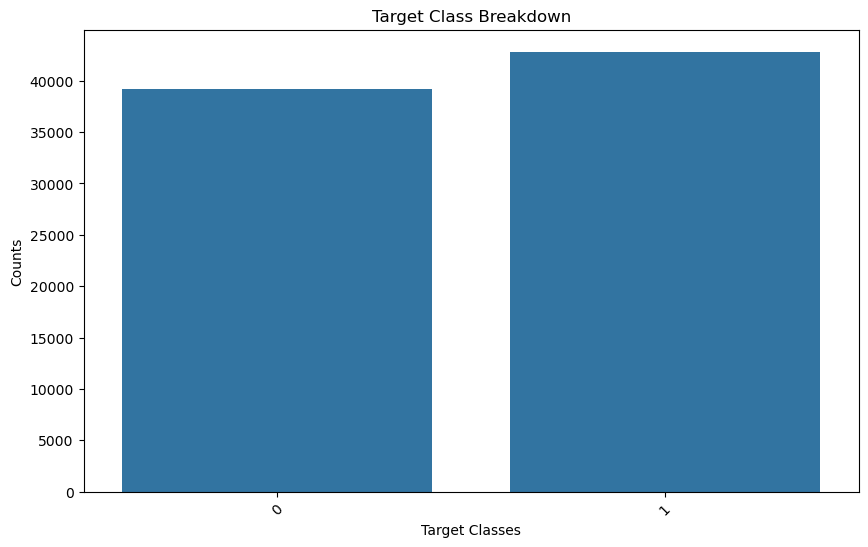

In [20]:
check_class_imbalance(df["label"])

# Balanced Class means our model can generalize more accurately on unseen data.

# Data Visuals

In [21]:
df["len_review"] = df["text_combined"].apply(lambda review: len(review))
df["word_count"] = df["text_combined"].apply(lambda review: len(review.split(" ")))

In [23]:
cols = ["len_review", "word_count"]
for col in cols:
  plt.figure(figsize=(10, 7))
  sns.histplot(df[col], kde=True)
  plt.title(f"The Distribution of {col}")
  plt.yscale("log")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.xticks(rotation=45)
  plt.show()

# Data Preprocessing

In [ ]:
df["text_combined"] = df["text_combined"].apply(remove_stop)